Number of records in the dataset: 106
Label distribution in the dataset:
is_phishing
1    55
0    51
Name: count, dtype: int64
Training set: 84, Validation set: 11, Test set: 11
Training label distribution:
is_phishing
1    44
0    40
Name: count, dtype: int64
Validation label distribution:
is_phishing
1    6
0    5
Name: count, dtype: int64
Test label distribution:
is_phishing
0    6
1    5
Name: count, dtype: int64
Validation Accuracy: 0.6363636363636364
Validation Precision: 0.6666666666666666
Validation Recall: 0.6666666666666666
Validation F1-Score: 0.6666666666666666
Validation Log-Loss: 0.8070556368223731
Test Accuracy: 0.7272727272727273
Test Precision: 0.625
Test Recall: 1.0
Test F1-Score: 0.7692307692307693
Test Log-Loss: 0.3863234031923168


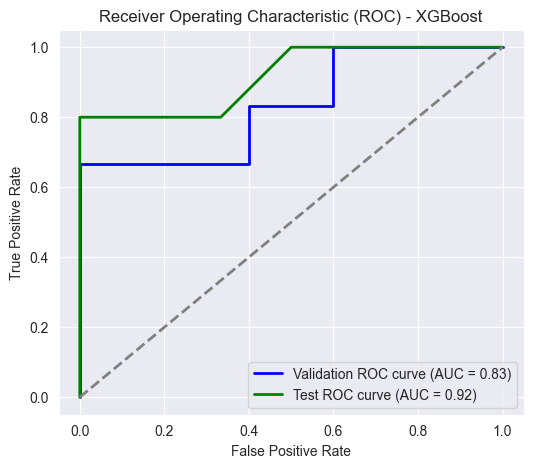

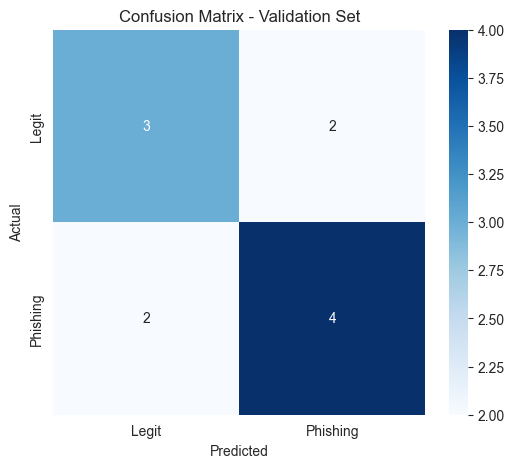

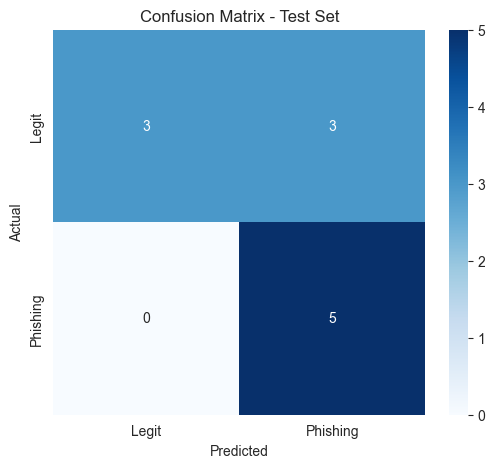

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Load dataset.
data = pd.read_csv(r'C:\Users\krenn\PycharmProjects\Phishing_DetectionRF_XGBoost\datasets_phishing\Deduplicated_Sorted_Dataset.csv', delimiter=';')

# Debugging: Number of data points in the dataset
print(f"Number of records in the dataset: {data.shape[0]}")
print(f"Label distribution in the dataset:\n{data['is_phishing'].value_counts()}")

# Split into training, validation, and test sets
train, temp = train_test_split(data, test_size=0.2, random_state=42, stratify=data['is_phishing'])
val, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp['is_phishing'])

# Debugging: Check dataset sizes
print(f"Training set: {len(train)}, Validation set: {len(val)}, Test set: {len(test)}")
print(f"Training label distribution:\n{train['is_phishing'].value_counts()}")
print(f"Validation label distribution:\n{val['is_phishing'].value_counts()}")
print(f"Test label distribution:\n{test['is_phishing'].value_counts()}")

# Split data into features (X) and target (y)
X_train = train.drop(columns=['is_phishing', 'url'])
y_train = train['is_phishing']
X_val = val.drop(columns=['is_phishing', 'url'])
y_val = val['is_phishing']
X_test = test.drop(columns=['is_phishing', 'url'])
y_test = test['is_phishing']

# XGBoost-Modell trainieren mit Standardwerten
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Vorhersage für das Validierungsset
y_val_pred_xgb = xgb_model.predict(X_val)
y_val_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Berechnung der Metriken für Validierung
accuracy_val_xgb = accuracy_score(y_val, y_val_pred_xgb)
precision_val_xgb = precision_score(y_val, y_val_pred_xgb)
recall_val_xgb = recall_score(y_val, y_val_pred_xgb)
f1_val_xgb = f1_score(y_val, y_val_pred_xgb)
log_loss_val_xgb = log_loss(y_val, xgb_model.predict_proba(X_val))

print(f"Validation Accuracy: {accuracy_val_xgb}")
print(f"Validation Precision: {precision_val_xgb}")
print(f"Validation Recall: {recall_val_xgb}")
print(f"Validation F1-Score: {f1_val_xgb}")
print(f"Validation Log-Loss: {log_loss_val_xgb}")

# ROC-Kurve für Validierung
fpr_val_xgb, tpr_val_xgb, _ = roc_curve(y_val, y_val_proba_xgb)
auc_val_xgb = auc(fpr_val_xgb, tpr_val_xgb)

# Vorhersage für das Testset
y_test_pred_xgb = xgb_model.predict(X_test)
y_test_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Berechnung der Metriken für Test
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
precision_test_xgb = precision_score(y_test, y_test_pred_xgb)
recall_test_xgb = recall_score(y_test, y_test_pred_xgb)
f1_test_xgb = f1_score(y_test, y_test_pred_xgb)
log_loss_test_xgb = log_loss(y_test, xgb_model.predict_proba(X_test))

print(f"Test Accuracy: {accuracy_test_xgb}")
print(f"Test Precision: {precision_test_xgb}")
print(f"Test Recall: {recall_test_xgb}")
print(f"Test F1-Score: {f1_test_xgb}")
print(f"Test Log-Loss: {log_loss_test_xgb}")

# ROC-Kurve für Test
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_test_proba_xgb)
auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

# Visualisierung der ROC-Kurve
plt.figure(figsize=(6, 5))
plt.plot(fpr_val_xgb, tpr_val_xgb, color='blue', lw=2, label=f'Validation ROC curve (AUC = {auc_val_xgb:.2f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, color='green', lw=2, label=f'Test ROC curve (AUC = {auc_test_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - XGBoost')
plt.legend(loc='lower right')
plt.show()

# Konfusionsmatrix für Validierungsset
plt.figure(figsize=(6, 5))
cm_val_xgb = confusion_matrix(y_val, y_val_pred_xgb)
sns.heatmap(cm_val_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Validation Set')
plt.show()

# Konfusionsmatrix für Testset
plt.figure(figsize=(6, 5))
cm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Test Set')
plt.show()
